In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 현재 경로의 corona.csv 파일 불러오기
corona = pd.read_csv('corona.csv')

In [3]:
corona

,등록일시,총사망자,총확진자,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0
2,2020-03-12 00:00:00.000,66,7869,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0
3,2020-03-13 00:00:00.000,67,7979,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0
4,2020-03-14 00:00:00.000,72,8086,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0
...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,9.0,12039.0
816,2022-06-05 08:53:19.426,24258,18163648,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,20.0,9834.0
817,2022-06-06 09:00:06.734,24279,18168670,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,21.0,5022.0
818,2022-06-07 09:09:00.897,24299,18174842,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,20.0,6172.0


In [4]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록일시    820 non-null    object 
 1   총사망자    820 non-null    int64  
 2   총확진자    820 non-null    int64  
 3   기준일     820 non-null    int64  
 4   기준시간    820 non-null    object 
 5   수정일시    817 non-null    object 
 6   누적의심자   692 non-null    float64
 7   누적확진율   623 non-null    float64
 8   일일사망자   820 non-null    float64
 9   일일확진자   820 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 64.2+ KB


### <요일별 일일확진자 수의 평균이 어떠한가>
1. 요일이라는 데이터가 존재하지 않는다면 -> 요일 컬럼 생성 필요
    - 등록일시, 기준일 중 하나를 시계열 데이터로 변환 (등록일시 선택)
    - 시계열 데이터에서 요일 데이터 추출하여 새로운 컬럼 생성 : 파생변수 생성
2. 요일을 기준으로 데이터프레임을 그룹화 -> 일일확진자의 평균을 그룹화연산
3. 그룹화 데이터를 이용해 그래프로 시각화 (막대 그래프 생성)

In [5]:
from datetime import datetime

In [6]:
# 등록일시를 시계열 데이터로 변환 (to_datetime)
# pandas 내의 to_datetime 사용
corona['등록일시'] = pd.to_datetime(corona['등록일시'])

In [7]:
corona['등록일시']

0     2020-03-10 00:00:00.000
1     2020-03-11 00:00:00.000
2     2020-03-12 00:00:00.000
3     2020-03-13 00:00:00.000
4     2020-03-14 00:00:00.000
                ...          
815   2022-06-04 08:56:49.219
816   2022-06-05 08:53:19.426
817   2022-06-06 09:00:06.734
818   2022-06-07 09:09:00.897
819   2022-06-08 09:09:05.982
Name: 등록일시, Length: 820, dtype: datetime64[ns]

In [8]:
# 시계열 데이터에서 요일 데이터 추출
# 시계열 데이터에서 특정 데이터 추출 : 시계열에서 문자로 변환 strftime()
# strftime() 함수는 datetime 안에 존재하는 함수
# Series에서 해당 함수를 사용하려면 datetime에 접근할 수 있는 method가 필요 -> dt

corona['요일'] = corona['등록일시'].dt.strftime('%w')        # 요일을 숫자로 표시 : %w

In [9]:
corona['요일2'] = corona['등록일시'].dt.strftime('%a')

In [10]:
corona.head()

,등록일시,총사망자,총확진자,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자,요일,요일2
0,2020-03-10,54,7513,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,2,Tue
1,2020-03-11,60,7755,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0,3,Wed
2,2020-03-12,66,7869,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0,4,Thu
3,2020-03-13,67,7979,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0,5,Fri
4,2020-03-14,72,8086,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0,6,Sat


In [11]:
# 요일을 기준으로 그룹화
# 그룹화연산 -> 일일확진자의 평균
group_data = corona.groupby('요일')['일일확진자'].mean()

In [12]:
group_data

요일
0    20801.384615
1    14739.230769
2    21783.652542
3    26994.550847
4    25776.267241
5    22542.854701
6    22555.948718
Name: 일일확진자, dtype: float64

In [13]:
group_data2 = corona.groupby('요일2')['일일사망자'].mean()

In [14]:
# 폰트 변경
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

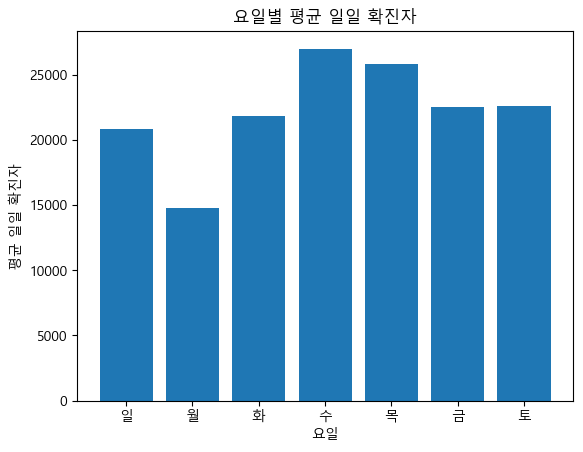

In [29]:
# 요일별 평균 일일확진자의 수를 막대 그래프로 표시
# 그래프의 이름, x축, y축 이름을 한글로 사용
# x축 데이터들도 한글 요일명으로 변경

# x축 데이터는 group_data의 인덱스 값
# y축 데이터는 group_data의 values 값

plt.bar(group_data.index, group_data)
plt.xlabel('요일')
plt.ylabel('평균 일일 확진자')
plt.title('요일별 평균 일일 확진자')
plt.xticks(group_data.index, ['일', '월', '화', '수', '목', '금', '토'])

plt.show()

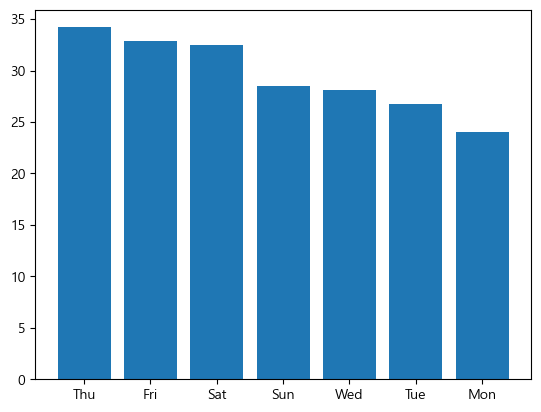

In [45]:
# 요일별 평균 일일 사망자의 수가 높은 순서로 막대 그래프 생성
# group_data2 일일 사망자 수 내림차순 정렬로 변경
group_data2.sort_values(ascending=False, inplace=True)

plt.bar(group_data2.index, group_data2)
plt.show()